In [ ]:
# Bruno Ugolini

# Exercise 1: Graph Making

Write a function called make_simple_graph that returns the graph object that represents the following diagram:

![](exercise2.png)

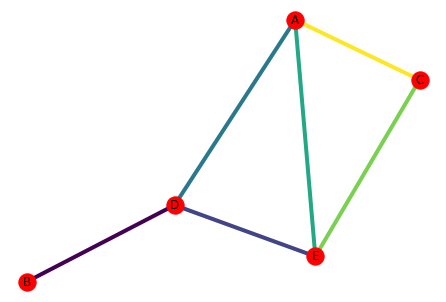

In [1]:
import networkx as nx

def make_simple_graph(nodes):
    """
    Given an array of nodes,
    depicts the network
    graphically.
    """
    
    G = nx.Graph(nodes)
    colors = range(len(G.edges))
    fig = nx.draw(G,with_labels=True,node_color='red',edge_color=colors,width=4)
    
    return 


nodes = [('B','D'),
         ('D','E'), ('D','A'), 
         ('A','E'), ('A','C'),
         ('E','C')
        ]

make_simple_graph(nodes)

## Exercise 1.2: computing diameter and node degrees of graphs

For the graph made by your function in the previous exercise, calculate the diameter and the degrees of each node, and visually confirm those values by inspecting the above graph. Write a function `compute_diameter_and_degrees` which takes a networkx graph object as input, and returns a `dict` with the diameter and the degrees of all the nodes in the graph.

**NOTE:** You cannot use a networkx function or method to compute the diameter or degrees. They have to be calculated yourself

```

compute_diameter_and_degrees(G) -> {
    'diameter': 3,
    'degree_A': 3,
    'degree_B': 1,
    'degree_C': 2,
    'degree_D': 3,
    'degree_E': 3,
}

In [2]:
import networkx as nx

def compute_diameter_and_degrees(G):
    """
    Compute the diameter and 
    degrees of the network
    provided.
    
    NOTE: rather than use
    nx.shortest path length, used 
    the code from the stretch goal
    of this workshop.
    """
    
    dia_deg = {}
    
    for node in G.nodes:
        degree = 0
        for edge in G.edges:
            if node in edge:
                degree += 1
        dia_deg['degree_'+node] = degree
    
    from itertools import combinations
    
    dia = 0
        
    for A, Z in combinations(G.nodes, 2):
        
        dia = max([dia, shortest_path(G, A, Z)])
    
    dia_deg['diameter'] = dia
    
    return dia_deg

import numpy as np

def shortest_path(G, s_node, e_node):
    """
    Calculate the shortest path
    length in a provided network
    G between start node s_node and
    end node e_node.
    """
    
    # create the unvisited set
    # and remove the start node
    unvisited = G.copy()
    
    # initialize all distances
    # as directed
    node_dist = {}
    for node in G.nodes:
        if node == s_node:
            node_dist[node] = 0
        else:
            node_dist[node] = np.inf
    
    # set the current node (initially
    # to start node s_node).
    c_node = s_node
    
    while c_node:
        
        for neigh in nx.neighbors(G, c_node):
        
            if neigh in unvisited:
            
                distance = node_dist[c_node]
        
                if distance + 1 < node_dist[neigh]:
                    node_dist[neigh] = distance + 1
            
        unvisited.remove_node(c_node)
        
        if len(unvisited) != 0:

            min_dist = min([v for k, v in node_dist.items() 
                            if k in unvisited])
            
            candidates = [k for k, v in node_dist.items() 
                          if v == min_dist and k in unvisited]
    
            if len(candidates) == 0:
                c_node = False
            else:
                c_node = candidates[0]
        else:
            c_node = False
    
    return node_dist[e_node]


G = nx.Graph([('B','D'), ('D','E'), ('D','A'), ('A','E'), ('A','C'), ('E','C')])
dia_deg = compute_diameter_and_degrees(G)
dia_deg

{'degree_B': 1,
 'degree_D': 3,
 'degree_E': 3,
 'degree_A': 3,
 'degree_C': 2,
 'diameter': 3}

## Exercise 1.3: An airline route map graph

CBDS Airlines has the following route map for the cities that it services, where every pair of cities has service in both directions between the cities:

```
routemap =  [('St. Louis', 'Miami'), ('St. Louis', 'San Diego'), ('St. Louis', 'Chicago'), ('San Diego', 'Chicago'), ('San Diego', 'San Francisco'), ('San Diego', 'Minneapolis'), ('San Diego', 'Boston'), ('San Diego', 'Portland'), ('San Diego', 'Seattle'), ('Tulsa', 'New York'), ('Tulsa', 'Dallas'), ('Phoenix', 'Cleveland'), ('Phoenix', 'Denver'), ('Phoenix', 'Dallas'), ('Chicago', 'New York'), ('Chicago', 'Los Angeles'), ('Miami', 'New York'), ('Miami', 'Philadelphia'), ('Miami', 'Denver'), ('Boston', 'Atlanta'), ('Dallas', 'Cleveland'), ('Dallas', 'Albuquerque'), ('Philadelphia', 'Atlanta'), ('Denver', 'Minneapolis'), ('Denver', 'Cleveland'), ('Albuquerque', 'Atlanta'), ('Minneapolis', 'Portland'), ('Los Angeles', 'Seattle'), ('San Francisco', 'Portland'), ('San Francisco', 'Seattle'), ('San Francisco', 'Cleveland'), ('Seattle', 'Portland')]

```

Copy this data into a networkX graph to answer the question.

1. What is the maximum number of hops that would ever be taken by a passenger on a single trip between any two serviced cities?

2. If you were a rich jet-setter traveling everywhere in across the country and were constrained to fly CBDS, which city would be the most optimal place for you to live, to minimize the number of hops you would have to make on average as you jet from home to your latest vacation spot?


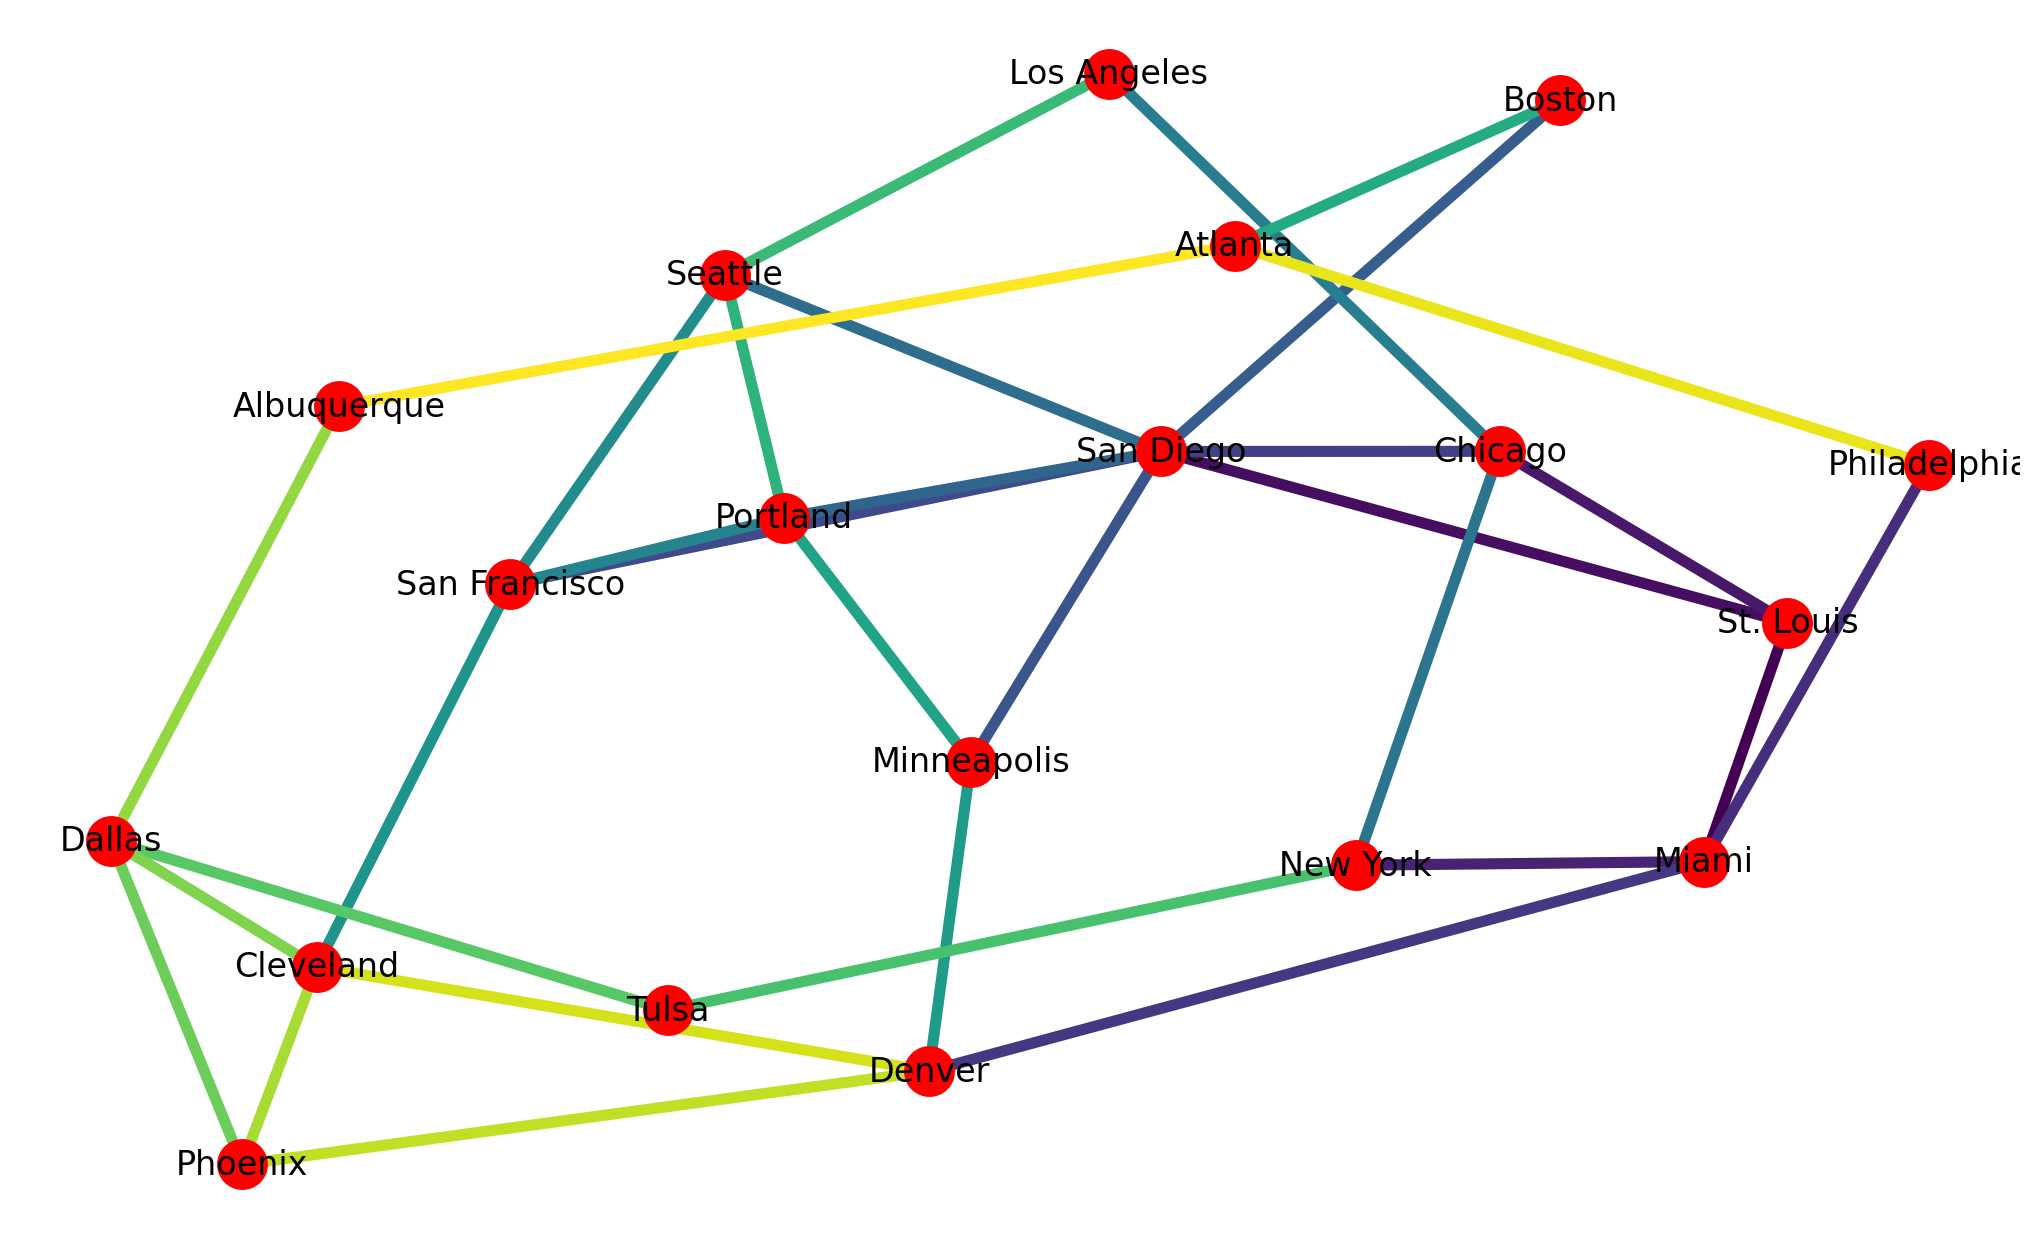

In [3]:
routemap =  [('St. Louis', 'Miami'), ('St. Louis', 'San Diego'), ('St. Louis', 'Chicago'), ('San Diego', 'Chicago'), ('San Diego', 'San Francisco'), ('San Diego', 'Minneapolis'), ('San Diego', 'Boston'), ('San Diego', 'Portland'), ('San Diego', 'Seattle'), ('Tulsa', 'New York'), ('Tulsa', 'Dallas'), ('Phoenix', 'Cleveland'), ('Phoenix', 'Denver'), ('Phoenix', 'Dallas'), ('Chicago', 'New York'), ('Chicago', 'Los Angeles'), ('Miami', 'New York'), ('Miami', 'Philadelphia'), ('Miami', 'Denver'), ('Boston', 'Atlanta'), ('Dallas', 'Cleveland'), ('Dallas', 'Albuquerque'), ('Philadelphia', 'Atlanta'), ('Denver', 'Minneapolis'), ('Denver', 'Cleveland'), ('Albuquerque', 'Atlanta'), ('Minneapolis', 'Portland'), ('Los Angeles', 'Seattle'), ('San Francisco', 'Portland'), ('San Francisco', 'Seattle'), ('San Francisco', 'Cleveland'), ('Seattle', 'Portland')]
import matplotlib.pyplot as plt
plt.figure(dpi=200, figsize=(10,6))
make_simple_graph(routemap)

In [5]:
def maximum_hops(G):
    """
    Calculate the maximum
    number of hops to get 
    from between any two cities
    on a single trip.
    """
    
    from itertools import combinations
    
    hops = 0
        
    for A, Z in combinations(G.nodes, 2):
        
        this_hop = nx.shortest_path(G, source=A, target=Z)
        
        if len(this_hop)-1 > hops:
            hops = len(this_hop) - 1
            longest = this_hop
        elif len(this_hop)-1 == hops:
            longest.append(this_hop)
            
    return hops, longest

G = nx.Graph(routemap)
hops, longest = maximum_hops(G)
print(f"The maximum number of hops is {hops} for the following route:")
' -> '.join(longest)

The maximum number of hops is 5 for the following route:


'Los Angeles -> Chicago -> San Diego -> Boston -> Atlanta -> Albuquerque'

In [8]:
def best_city(G):
    """
    Find the city with the 
    least number of hops to
    get to any other in the
    given network G.
    """
    
    city_hops = {}

    for node in G.nodes:
        
        all_paths = nx.shortest_path(G, source=node)
        
        summ = 0
        for path in all_paths.values():
            summ += len(path)
        city_hops[node] = summ / len(all_paths)
        
    return min(city_hops, key=city_hops.get)

print(f"The city with the smallest average number\nof hops to get anywhere in the network is: {best_city(G)}")

The city with the smallest average number
of hops to get anywhere in the network is: San Diego


# Exercise 2

Make an algorithm to generate [random walks](https://en.wikipedia.org/wiki/Random_walk) on a NetworkX graphs.

The form is `random_walk(G, nodeid, length)` so the input should be a graph, node ID and the number of steps to take in the random walk. The output is a list of node IDs in the walks

```

G = nx.binomial_graph(25, 0.3, directed=True)

# this output is random
# don't try to reproduce it exactly
random_walk(G, 3, 5) -> [3, 1, 4, 2, 3]
```


In [9]:
def random_walk(G, nodeid, length):
    """
    Generates a random walk on a 
    network G starting at nodeid
    for a walk of length 'length'
    """
    
    import random
    
    walk = [nodeid]

    node = nodeid
    
    for _ in range(length):
        
        choices = [k for k in nx.neighbors(G, node)]
        
        node = random.sample(choices, 1)[0]
        
        walk.append(node)
        
    return walk

import random
for node in G.nodes:
    j = random.randint(2,7)
    print(f"\nRandom walk for {node} for {j} steps:")
    print(' -> '.join(random_walk(G, node, j)))


Random walk for St. Louis for 5 steps:
St. Louis -> San Diego -> Seattle -> Portland -> Seattle -> Portland

Random walk for Miami for 2 steps:
Miami -> St. Louis -> San Diego

Random walk for San Diego for 4 steps:
San Diego -> St. Louis -> Miami -> New York -> Miami

Random walk for Chicago for 7 steps:
Chicago -> New York -> Chicago -> San Diego -> Chicago -> St. Louis -> Miami -> New York

Random walk for San Francisco for 5 steps:
San Francisco -> Seattle -> Portland -> Minneapolis -> San Diego -> Seattle

Random walk for Minneapolis for 6 steps:
Minneapolis -> San Diego -> St. Louis -> Chicago -> St. Louis -> Chicago -> St. Louis

Random walk for Boston for 3 steps:
Boston -> San Diego -> Portland -> San Francisco

Random walk for Portland for 4 steps:
Portland -> San Diego -> Chicago -> New York -> Chicago

Random walk for Seattle for 7 steps:
Seattle -> Portland -> San Francisco -> San Diego -> Seattle -> Portland -> San Diego -> Chicago

Random walk for Tulsa for 3 steps:
Tul

## Exercise 2.2

Modify your random walk algorithm so that:

- It takes in on a weighed graph's adjacency matrix (a numpy matrix). 

- The probability to go from node A to node B should be proportional to the weight on their edge (relative to the other edges starting at node A).

Example:
```
G = np.array([
    [0, 0.5, 0, 0.5],
    [0.5, 0, 0, 0.5],
    [0.25, 0.25, 0.25, 0.25],
    [0.5, 0.5, 0, 0],
])

random_walk(G, 0, 4) -> [0, 1, 0, 3]
```

Here, `node 0` would give us 50% chance to transition to `node 1` and 50% chance to transition to `node 3`.

Then `node 1` would give us 50% chance to transition to `node 0` and 50% to `node 3`, etc.

In [14]:
def generate_prob(G):
    """
    Generate an array of 
    probability values for 
    the edges in a graph:
    a random result.
    """
    # get max degree
    degree_sequence = [d for n, d in G.degree()]
    dmax = max(degree_sequence)
    
    Gp = np.zeros((len(G.nodes),dmax))
    
    for i, node in enumerate(G.nodes):
        tmp = np.random.randint(0, dmax, size=degree_sequence[i])
        tmp = np.round(tmp / sum(tmp),3)
        if degree_sequence[i] < dmax:
            Gp[i,:] = np.concatenate((tmp, np.zeros(dmax-degree_sequence[i])))
        else:
            Gp[i,:] = tmp
        print(f"Node: {node:<14};\t deg: {degree_sequence[i]}: {Gp[i,:]}")
    return Gp

def random_walk_wghtd(G, Gp, nodeid, length):
    """
    Generates a randome walk
    in G starting at nodeid for
    length 'length' given the
    probability matrix Gp.
    """
    
    import random
    
    walk = [nodeid]
    node = nodeid
    
    for i in range(length):
        
        choices = [k for k in nx.neighbors(G, node)]
        # take only the elements in Gp that concern us
        node = random.choices(choices, weights=Gp[i,:len(choices)], k=1)[0]
        walk.append(node)
        
    return walk

# generate a probability matrix 
# that assigns a probability
# for all edges for each node
print(f"Probability matrix: (a function of the edges available):")
Gp = generate_prob(G)

for node in random.choices([nd for nd in G.nodes], k=3):
    j = random.randint(2,7)
    print(f"\nRandom walk for {node} for {j} steps:")
    print(random_walk_wghtd(G, Gp, node, j))

Probability matrix: (a function of the edges available):
Node: St. Louis     ;	 deg: 3: [1. 0. 0. 0. 0. 0. 0.]
Node: Miami         ;	 deg: 4: [0.25 0.   0.5  0.25 0.   0.   0.  ]
Node: San Diego     ;	 deg: 7: [0.2   0.333 0.    0.067 0.    0.333 0.067]
Node: Chicago       ;	 deg: 4: [0.375 0.188 0.312 0.125 0.    0.    0.   ]
Node: San Francisco ;	 deg: 4: [0.167 0.167 0.333 0.333 0.    0.    0.   ]
Node: Minneapolis   ;	 deg: 3: [0.6 0.  0.4 0.  0.  0.  0. ]
Node: Boston        ;	 deg: 2: [0.4 0.6 0.  0.  0.  0.  0. ]
Node: Portland      ;	 deg: 4: [0.167 0.417 0.417 0.    0.    0.    0.   ]
Node: Seattle       ;	 deg: 4: [0.333 0.2   0.133 0.333 0.    0.    0.   ]
Node: Tulsa         ;	 deg: 2: [0.6 0.4 0.  0.  0.  0.  0. ]
Node: New York      ;	 deg: 3: [0.333 0.267 0.4   0.    0.    0.    0.   ]
Node: Dallas        ;	 deg: 4: [0.154 0.308 0.462 0.077 0.    0.    0.   ]
Node: Phoenix       ;	 deg: 3: [0.714 0.143 0.143 0.    0.    0.    0.   ]
Node: Cleveland     ;	 deg: 4: [0.273 


# (stretch) Exercise 3: Dijkstra's Shortest Path Algorithm

Dijkstra's algorithm uses breadth first search to find the **shortest path** between two nodes in a graph.

It goes like this:

----

Let the node at which we are starting be called the initial node. Let the distance of node Y be the distance from the initial node to Y. Dijkstra's algorithm will assign some initial distance values and will try to improve them step by step.

1. Mark all nodes unvisited. Create a set of all the unvisited nodes called the unvisited set.

2. Assign to every node a tentative distance value: set it to zero for our initial node and to infinity for all other nodes. Set the initial node as current.

3. For the current node, consider all of its unvisited neighbours and calculate their tentative distances through the current node. Compare the newly calculated tentative distance to the current assigned value and assign the smaller one. For example, if the current node A is marked with a distance of 6, and the edge connecting it with a neighbour B has length 2, then the distance to B through A will be 6 + 2 = 8. If B was previously marked with a distance greater than 8 then change it to 8. Otherwise, the current value will be kept.

4. When we are done considering all of the unvisited neighbours of the current node, mark the current node as visited and remove it from the unvisited set. A visited node will never be checked again.

5. If the destination node has been marked visited (when planning a route between two specific nodes) or if the smallest tentative distance among the nodes in the unvisited set is infinity (when planning a complete traversal; occurs when there is no connection between the initial node and remaining unvisited nodes), then stop. The algorithm has finished.

6. Otherwise, select the unvisited node that is marked with the smallest tentative distance, set it as the new "current node", and go back to step 3.

----

Here is a GIF of it in action:

![](Dijkstras_progress_animation.gif)

Implement `shortest_path(G, start_node, end_node)` which takes in a networkX graph, a starting node and an end node and outputs a list of nodes which is the shortest path between the start and end.

You can use networkX's shortest path function to test your result, but not to implement it.

In [16]:
import numpy as np

def shortest_path(G, s_node, e_node):
    """
    Calculate the shortest path
    length in a provided network
    G between start node s_node and
    end node e_node.
    """
    
    # create the unvisited set
    # and remove the start node
    unvisited = G.copy()
    
    # initialize all distances
    # as directed
    node_dist = {}
    for node in G.nodes:
        if node == s_node:
            node_dist[node] = 0
        else:
            node_dist[node] = np.inf
    
    # set the current node (initially
    # to start node s_node).
    c_node = s_node
    
    while c_node:
        
        for neigh in nx.neighbors(G, c_node):
        
            if neigh in unvisited:
            
                distance = node_dist[c_node]
        
                if distance + 1 < node_dist[neigh]:
                    node_dist[neigh] = distance + 1
            
        unvisited.remove_node(c_node)
        
        if len(unvisited) != 0:

            min_dist = min([v for k, v in node_dist.items() 
                            if k in unvisited])
            
            candidates = [k for k, v in node_dist.items() 
                          if v == min_dist and k in unvisited]
    
            if len(candidates) == 0:
                c_node = False
            else:
                c_node = candidates[0]
        else:
            c_node = False
    
    return node_dist[e_node]


G = nx.Graph(routemap)
s_node = 'Miami'
others = [node for node in G.nodes if node != 'Miami']
for node in others:
    print(f"          shortest_path: From {s_node} to {node}: {shortest_path(G, s_node, node)}")
    print(f"nx.shortest_path_length: From {s_node} to {node}: {nx.shortest_path_length(G, s_node, node)}\n")

          shortest_path: From Miami to St. Louis: 1
nx.shortest_path_length: From Miami to St. Louis: 1

          shortest_path: From Miami to San Diego: 2
nx.shortest_path_length: From Miami to San Diego: 2

          shortest_path: From Miami to Chicago: 2
nx.shortest_path_length: From Miami to Chicago: 2

          shortest_path: From Miami to San Francisco: 3
nx.shortest_path_length: From Miami to San Francisco: 3

          shortest_path: From Miami to Minneapolis: 2
nx.shortest_path_length: From Miami to Minneapolis: 2

          shortest_path: From Miami to Boston: 3
nx.shortest_path_length: From Miami to Boston: 3

          shortest_path: From Miami to Portland: 3
nx.shortest_path_length: From Miami to Portland: 3

          shortest_path: From Miami to Seattle: 3
nx.shortest_path_length: From Miami to Seattle: 3

          shortest_path: From Miami to Tulsa: 2
nx.shortest_path_length: From Miami to Tulsa: 2

          shortest_path: From Miami to New York: 1
nx.shortest_path